<a href="https://colab.research.google.com/github/Oreki820/Projetos-EBAC/blob/main/Profissao_Cientista_de_Dados_M37_Projeto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Projeto: Previs√£o de Inten√ß√£o de Compra de Clientes em Loja Web**

**Descri√ß√£o do Projeto**

Neste projeto, nosso objetivo √© criar um sistema inteligente para antecipar a inten√ß√£o de compra dos clientes em um site de e-commerce. Imagine poder prever quais clientes t√™m maior probabilidade de realizar compras online, com base em suas caracter√≠sticas e comportamentos passados. Essa capacidade de prever a inten√ß√£o de compra n√£o s√≥ aprimorar√° a experi√™ncia do cliente, mas tamb√©m permitir√° que a empresa direcione seus esfor√ßos de marketing de forma mais eficaz.

**Objetivo**

Queremos desenvolver um modelo preditivo capaz de analisar os padr√µes de comportamento dos clientes e identificar sinais que indicam a propens√£o deles para realizar compras no site da empresa. Para isso, vamos usar uma base de dados que cont√©m informa√ß√µes detalhadas sobre os clientes, incluindo:

Dados demogr√°ficos (idade, renda, etc.)

Informa√ß√µes sobre compras anteriores



# Base de dados:

Year_Birth: Ano de nascimento do cliente.

Education: N√≠vel de escolaridade do cliente.

Marital_Status: Estado civil do cliente.

Income: Renda anual da fam√≠lia do cliente.

Kidhome: N√∫mero de crian√ßas na casa do cliente.

Recency: N√∫mero de dias desde a √∫ltima compra do cliente.

Complain: 1 se o cliente reclamou nos √∫ltimos 2 anos, 0 caso contr√°rio.

MntWines: Valor gasto em vinhos nos √∫ltimos 2 anos.

MntFruits: Valor gasto em frutas nos √∫ltimos 2 anos.

MntMeatProducts: Valor gasto em carnes nos √∫ltimos 2 anos.

MntFishProducts: Valor gasto em peixes nos √∫ltimos 2 anos.

MntSweetProducts: Valor gasto em doces nos √∫ltimos 2 anos.

MntGoldProds: Valor gasto em produtos de ouro nos √∫ltimos 2 anos.

NumDealsPurchases: N√∫mero de compras feitas com desconto

NumStorePurchases: N√∫mero de compras feitas diretamente nas lojas.

NumWebVisitsMonth: N√∫mero de visitas ao site da empresa no √∫ltimo m√™s.






**WebPurchases: N√∫mero de compras feitas pelo site da empresa.**

In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split

# ETAPA 1:

**Prepara√ß√£o dos Dados**

**Explora√ß√£o e Limpeza:** Analisar e limpar os dados para garantir que estejam prontos para a modelagem.

**An√°lise:** Construa uma storytelling com gr√°ficos, analisando e retirando insights das informa√ß√µes.

In [46]:
base = pd.read_csv('/content/marketing_campaign.csv', delimiter=';')

print("Formato da base:", base.shape)
display(base.head(3))

Formato da base: (2240, 16)


Year_Birth   Education  ... Complain  WebPurchases
0        1957  Graduation  ...        0             1
1        1954  Graduation  ...        0             0
2        1965  Graduation  ...        0             1

[3 rows x 16 columns]

In [47]:
display(base.info())
display(base.describe(include='all').T)

# % de nulos
nulls = base.isna().mean().sort_values(ascending=False)
print("Percentual de nulos por coluna:")
display((nulls*100).round(2))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year_Birth         2240 non-null   int64  
 1   Education          2240 non-null   object 
 2   Marital_Status     2240 non-null   object 
 3   Income             2216 non-null   float64
 4   Kidhome            2240 non-null   int64  
 5   Recency            2240 non-null   int64  
 6   MntWines           2240 non-null   int64  
 7   MntFruits          2240 non-null   int64  
 8   MntMeatProducts    2240 non-null   int64  
 9   MntFishProducts    2240 non-null   int64  
 10  MntSweetProducts   2240 non-null   int64  
 11  MntGoldProds       2240 non-null   int64  
 12  NumStorePurchases  2240 non-null   int64  
 13  NumWebVisitsMonth  2240 non-null   int64  
 14  Complain           2240 non-null   int64  
 15  WebPurchases       2240 non-null   int64  
dtypes: float64(1), int64(13)

None

count unique         top  ...      50%      75%       max
Year_Birth         2240.0    NaN         NaN  ...   1970.0   1977.0    1996.0
Education            2240      5  Graduation  ...      NaN      NaN       NaN
Marital_Status       2240      8     Married  ...      NaN      NaN       NaN
Income             2216.0    NaN         NaN  ...  51381.5  68522.0  666666.0
Kidhome            2240.0    NaN         NaN  ...      0.0      1.0       2.0
Recency            2240.0    NaN         NaN  ...     49.0     74.0      99.0
MntWines           2240.0    NaN         NaN  ...    173.5   504.25    1493.0
MntFruits          2240.0    NaN         NaN  ...      8.0     33.0     199.0
MntMeatProducts    2240.0    NaN         NaN  ...     67.0    232.0    1725.0
MntFishProducts    2240.0    NaN         NaN  ...     12.0     50.0     259.0
MntSweetProducts   2240.0    NaN         NaN  ...      8.0     33.0     263.0
MntGoldProds       2240.0    NaN         NaN  ...     24.0     56.0     362.0
NumStorePurchases  2240.0    NaN         NaN  ...      5.0      8.0      13.0
NumWebVisitsMonth  2240.0    NaN         NaN  ...      6.0      7.0      20.0
Complain           2240.0    NaN         NaN  ...      0.0      0.0       1.0
WebPurchases       2240.0    NaN         NaN  ...      1.0      1.0       1.0

[16 rows x 11 columns]

Percentual de nulos por coluna:


Income               1.07
Year_Birth           0.00
Education            0.00
Marital_Status       0.00
Kidhome              0.00
Recency              0.00
MntWines             0.00
MntFruits            0.00
MntMeatProducts      0.00
MntFishProducts      0.00
MntSweetProducts     0.00
MntGoldProds         0.00
NumStorePurchases    0.00
NumWebVisitsMonth    0.00
Complain             0.00
WebPurchases         0.00
dtype: float64

In [48]:
ANO_ATUAL = 2025
base["Age"] = ANO_ATUAL - base["Year_Birth"]

# Gasto total (soma das cestas de produtos)
gasto_cols = ["MntWines","MntFruits","MntMeatProducts","MntFishProducts","MntSweetProducts","MntGoldProds"]
base["MntTotal"] = base[gasto_cols].sum(axis=1)

# Compras totais (aproxima√ß√£o simples)
compras_cols = ["NumDealsPurchases","NumStorePurchases","WebPurchases"]
presentes = [c for c in compras_cols if c in base.columns]
base["ComprasTotal"] = base[presentes].sum(axis=1)

# Alvo bin√°rio: inten√ß√£o de compra no site
base["IntencaoWeb"] = (base["WebPurchases"] > 0).astype(int)

print("Vis√£o geral de novas colunas:")
display(base[["Age","MntTotal","ComprasTotal","NumWebVisitsMonth","WebPurchases","IntencaoWeb"]].describe())
print("Taxa de positivos (IntencaoWeb=1):", base["IntencaoWeb"].mean().round(3))

Vis√£o geral de novas colunas:


Age     MntTotal  ...  WebPurchases  IntencaoWeb
count  2240.000000  2240.000000  ...   2240.000000  2240.000000
mean     56.194196   605.798214  ...      0.503571     0.503571
std      11.984069   602.249288  ...      0.500099     0.500099
min      29.000000     5.000000  ...      0.000000     0.000000
25%      48.000000    68.750000  ...      0.000000     0.000000
50%      55.000000   396.000000  ...      1.000000     1.000000
75%      66.000000  1045.500000  ...      1.000000     1.000000
max     132.000000  2525.000000  ...      1.000000     1.000000

[8 rows x 6 columns]

Taxa de positivos (IntencaoWeb=1): 0.504


In [49]:
#Idades an√¥malas (> 100) ‚Üí resolverei filtrando Age entre 15 e 100.
base = base[(base['Age'] >= 15) & (base['Age'] <= 100)]

#Renda com outliers extremos (at√© 666 666) ‚Üí usarei winsorization (clip 1¬∫ e 99¬∫ percentil).
q_low, q_hi = base['Income'].quantile([0.01, 0.99])
base['Income'] = base['Income'].clip(lower=q_low, upper=q_hi)

#Pequeno n√∫mero de nulos (1,07 % em Income) ‚Üí preencher com a mediana.
base['Income'] = base['Income'].fillna(base['Income'].median())

In [50]:
base[['Age','Income']].describe()

Age        Income
count  2237.000000   2237.000000
mean     56.098346  51754.684131
std      11.701917  20617.389100
min      29.000000   7563.360000
25%      48.000000  35523.000000
50%      55.000000  51373.000000
75%      66.000000  68281.000000
max      85.000000  94461.440000

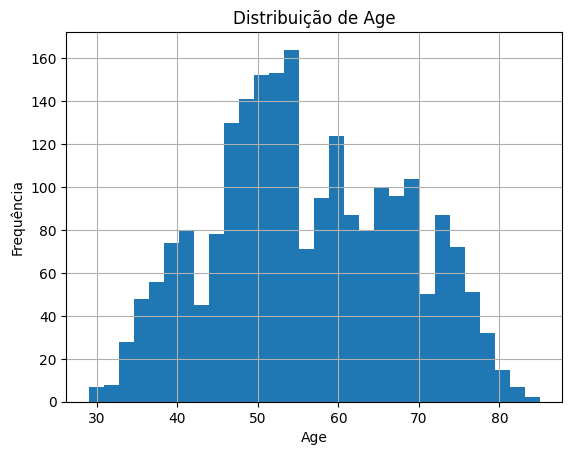

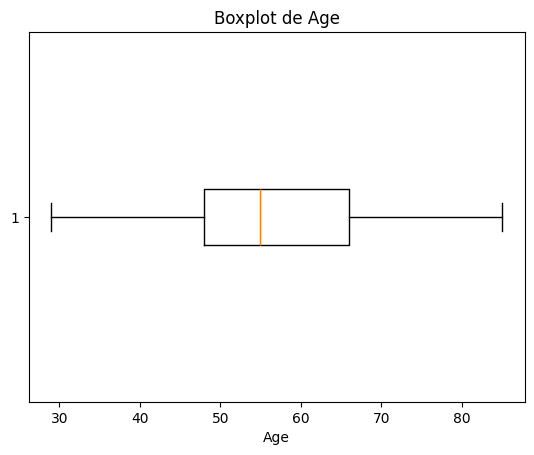

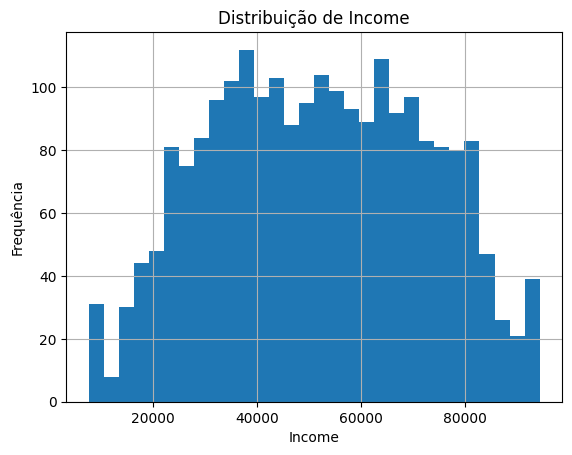

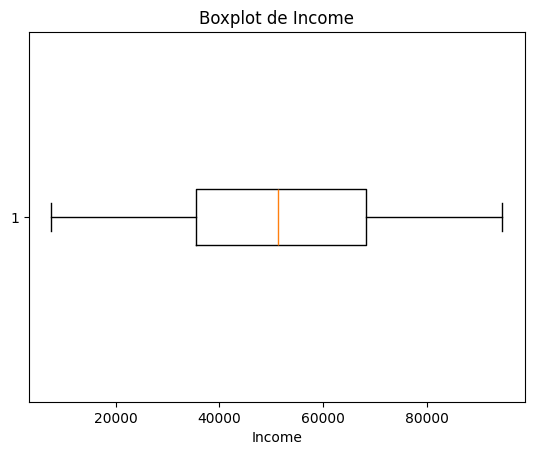

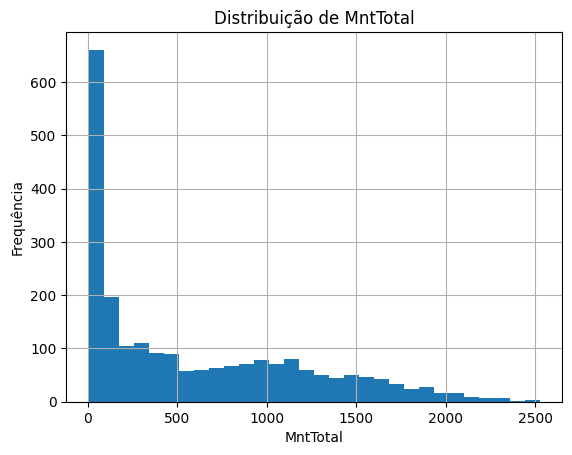

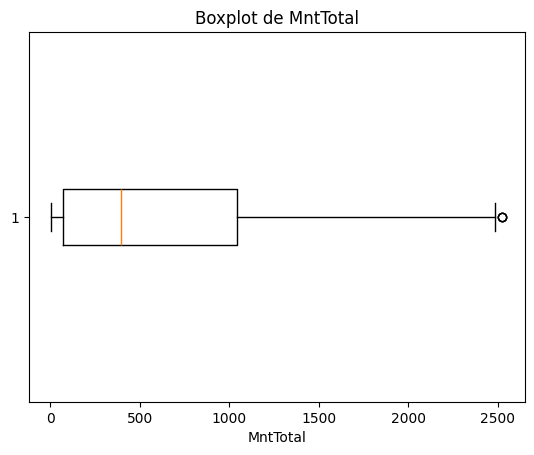

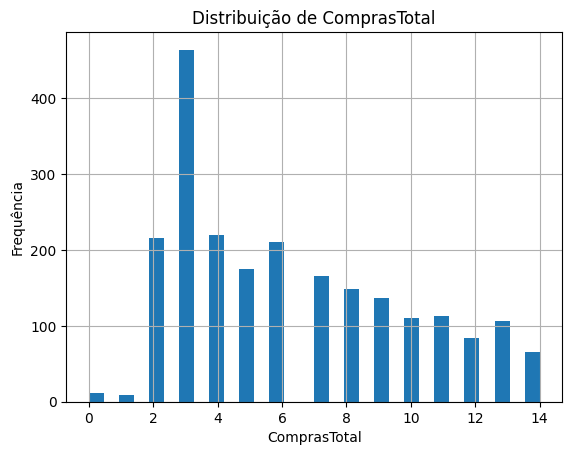

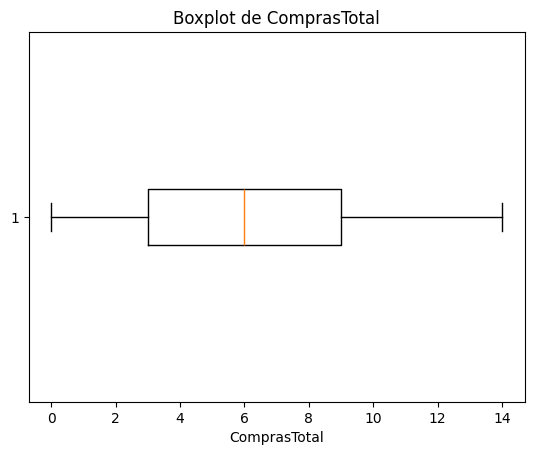

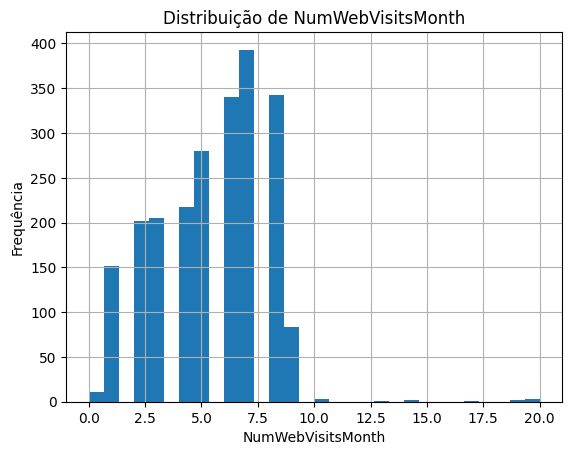

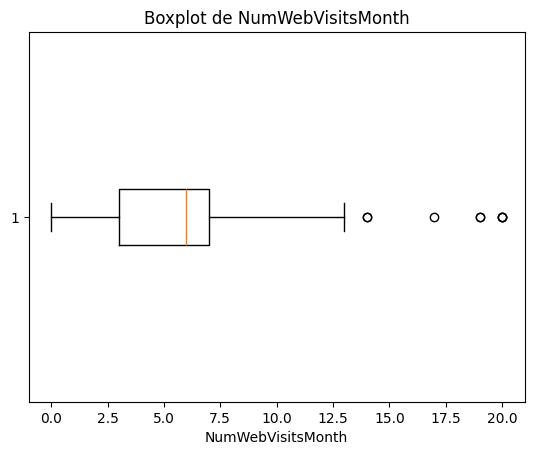

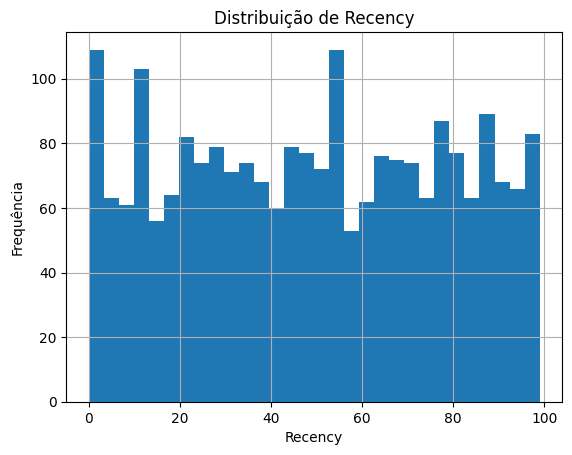

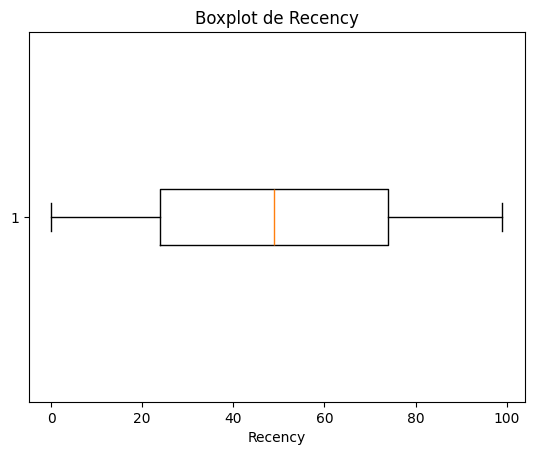

In [51]:

def hist_box(df, col, bins=30):
    fig, ax = plt.subplots()
    df[col].hist(bins=bins, ax=ax)
    ax.set_title(f"Distribui√ß√£o de {col}")
    ax.set_xlabel(col); ax.set_ylabel("Frequ√™ncia")
    plt.show()

    fig, ax = plt.subplots()
    ax.boxplot(df[col].dropna(), vert=False)
    ax.set_title(f"Boxplot de {col}")
    ax.set_xlabel(col)
    plt.show()

for c in ["Age","Income","MntTotal","ComprasTotal","NumWebVisitsMonth","Recency"]:
    if c in base.columns:
        hist_box(base, c)

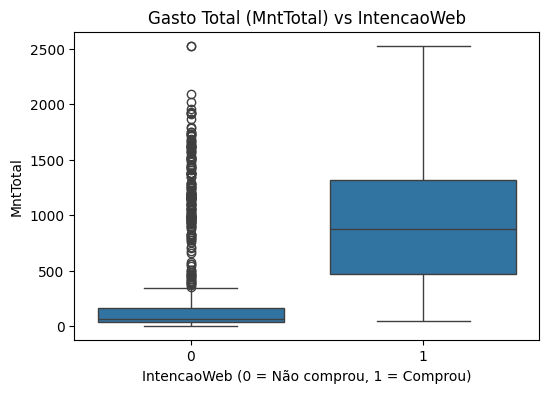

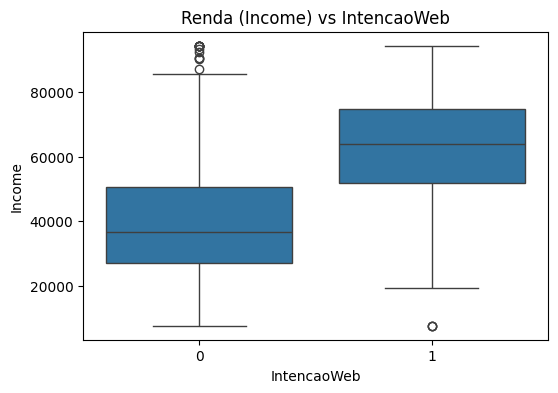

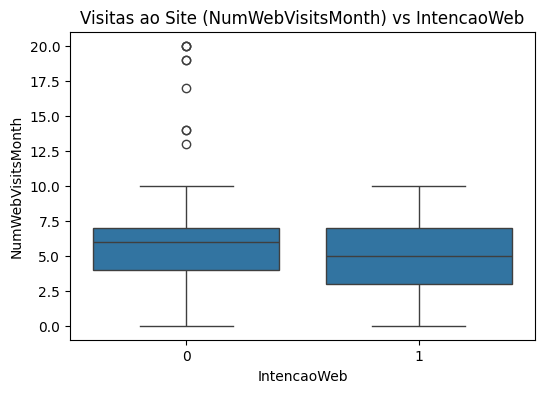

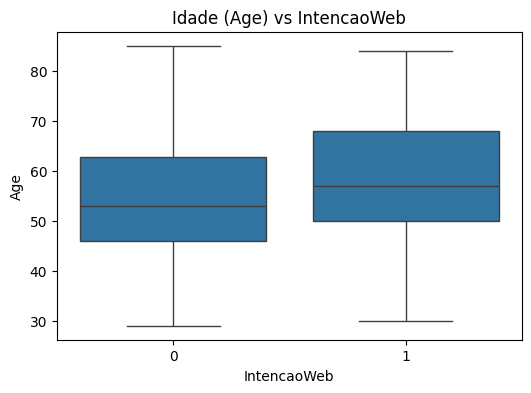

In [52]:
# Gr√°ficos Bivariados - Rela√ß√£o entre vari√°veis e IntencaoWeb

# 1) MntTotal vs IntencaoWeb
plt.figure(figsize=(6,4))
sns.boxplot(x=base['IntencaoWeb'], y=base['MntTotal'])
plt.title('Gasto Total (MntTotal) vs IntencaoWeb')
plt.xlabel('IntencaoWeb (0 = N√£o comprou, 1 = Comprou)')
plt.ylabel('MntTotal')
plt.show()

# 2) Income vs IntencaoWeb
plt.figure(figsize=(6,4))
sns.boxplot(x=base['IntencaoWeb'], y=base['Income'])
plt.title('Renda (Income) vs IntencaoWeb')
plt.xlabel('IntencaoWeb')
plt.ylabel('Income')
plt.show()

# 3) NumWebVisitsMonth vs IntencaoWeb (tend√™ncia inversa)
plt.figure(figsize=(6,4))
sns.boxplot(x=base['IntencaoWeb'], y=base['NumWebVisitsMonth'])
plt.title('Visitas ao Site (NumWebVisitsMonth) vs IntencaoWeb')
plt.xlabel('IntencaoWeb')
plt.ylabel('NumWebVisitsMonth')
plt.show()

# 4) Age vs IntencaoWeb
plt.figure(figsize=(6,4))
sns.boxplot(x=base['IntencaoWeb'], y=base['Age'])
plt.title('Idade (Age) vs IntencaoWeb')
plt.xlabel('IntencaoWeb')
plt.ylabel('Age')
plt.show()

**Insights Bivariados:**

- Clientes com **maior gasto total (MntTotal)** tendem a comprar mais online.
- Clientes com **renda mais alta** compram mais online.
- Clientes que **visitam o site muitas vezes mas n√£o compram** s√£o oportunidade de remarketing.
- A **idade m√©dia de quem compra √© um pouco menor** que a de quem n√£o compra.

Esses padr√µes confirmam que vari√°veis como **MntTotal, Income, NumWebVisitsMonth e Age** t√™m rela√ß√£o com o alvo e devem ser mantidas no modelo.


In [53]:
# M√©dia de MntTotal por classe do alvo
print("M√©dia de MntTotal por IntencaoWeb:")
display(base.groupby("IntencaoWeb")["MntTotal"].mean().round(2))

# Idade e renda por classe
print("M√©dias por classe:")
display(base.groupby("IntencaoWeb")[["Age","Income"]].mean().round(2))

# WebPurchases vs Recency (menor recency = compra mais recente)
print("WebPurchases m√©dio por quartil de Recency:")
display(base.groupby(pd.qcut(base["Recency"], 4))["WebPurchases"].mean().round(2))

# Categ√≥ricas vs taxa de inten√ß√£o (se existirem)
for cat in ["Education","Marital_Status"]:
    if cat in base.columns:
        print(f"\nTaxa de IntencaoWeb por {cat}:")
        display(base.groupby(cat)["IntencaoWeb"].mean().sort_values(ascending=False).round(3))

M√©dia de MntTotal por IntencaoWeb:


IntencaoWeb
0    263.42
1    942.91
Name: MntTotal, dtype: float64

M√©dias por classe:


Age    Income
IntencaoWeb                 
0            54.19  40290.97
1            57.98  63045.47

WebPurchases m√©dio por quartil de Recency:


/tmp/ipython-input-1485195026.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  display(base.groupby(pd.qcut(base["Recency"], 4))["WebPurchases"].mean().round(2))


Recency
(-0.001, 24.0]    0.51
(24.0, 49.0]      0.47
(49.0, 74.0]      0.55
(74.0, 99.0]      0.48
Name: WebPurchases, dtype: float64


Taxa de IntencaoWeb por Education:


Education
PhD           0.567
Graduation    0.515
Master        0.495
2n Cycle      0.428
Basic         0.056
Name: IntencaoWeb, dtype: float64


Taxa de IntencaoWeb por Marital_Status:


Marital_Status
YOLO        1.000
Widow       0.584
Divorced    0.537
Together    0.508
Married     0.505
Absurd      0.500
Single      0.468
Alone       0.333
Name: IntencaoWeb, dtype: float64

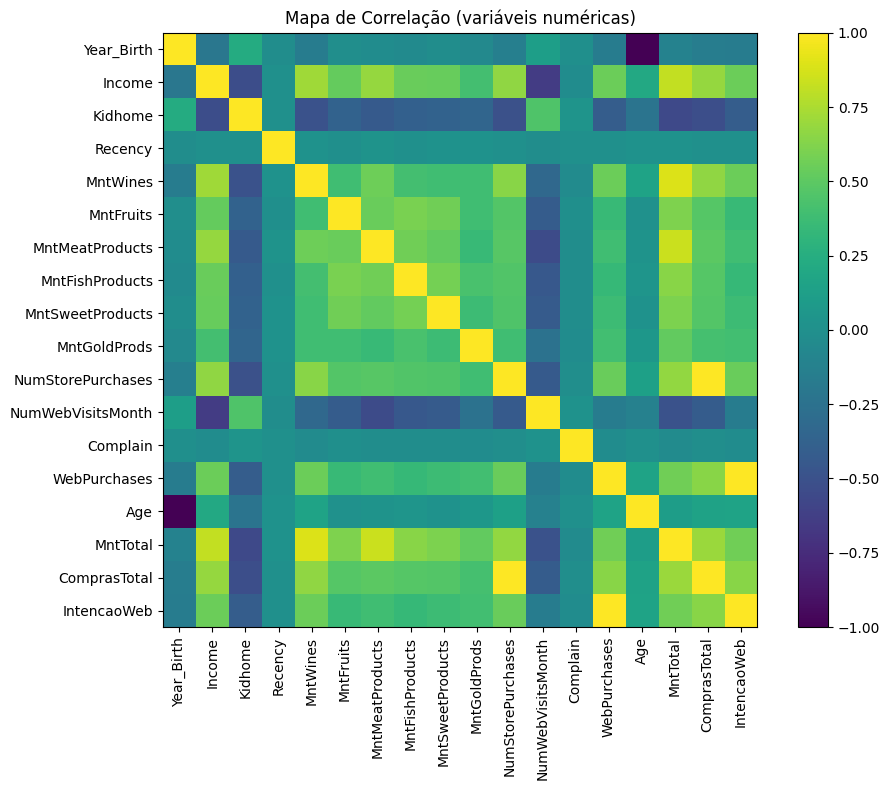

In [54]:
# === Correla√ß√£o num√©rica (heatmap simples em matplotlib) ===
num_cols = base.select_dtypes(include=[np.number]).columns
corr = base[num_cols].corr()

fig, ax = plt.subplots(figsize=(10,8))
cax = ax.imshow(corr, interpolation='nearest')
ax.set_title("Mapa de Correla√ß√£o (vari√°veis num√©ricas)")
plt.xticks(range(len(num_cols)), num_cols, rotation=90)
plt.yticks(range(len(num_cols)), num_cols)
fig.colorbar(cax)
plt.tight_layout()
plt.show()

**Objetivo**

Nosso objetivo √© entender o comportamento dos clientes de um e-commerce e identificar padr√µes que est√£o associados √† inten√ß√£o de compra no site **(WebPurchases)**. Essa an√°lise inicial √© fundamental para descobrir caracter√≠sticas relevantes que ajudar√£o os modelos de Machine Learning a prever quem tem maior probabilidade de comprar online.

---

üë§ 1. Perfil Demogr√°fico
‚úÖ Idade (Age)

A maioria dos clientes est√° entre **40 e 70 anos**.

A mediana √© **55 anos.**

Encontrei alguns valores acima de 100 anos, o que indica poss√≠veis erros ou outliers.

O p√∫blico do e-commerce √© predominantemente adulto/maduro, indicando um perfil com poder aquisitivo mais est√°vel.

---

‚úÖ Renda (Income)

M√©dia ‚âà 52.000

Distribui√ß√£o assim√©trica, com poucos clientes ganhando acima de 200.000 at√© 666.666.

Esses valores extremos distorcem as visualiza√ß√µes e estat√≠sticas. ent√£o os removi

Preenchi os 1,07% de valores nulos com a mediana.

Existe uma grande varia√ß√£o de renda entre os clientes. Clientes de alta renda podem representar um grupo VIP com maior potencial de compras.

---

üõçÔ∏è 2. H√°bitos de Consumo

‚úÖ MntTotal (total gasto em produtos)

Muito concentrado em valores baixos, mas com uma cauda longa at√© R$ 2.500.

Clientes que gastam mais tendem a ter maior Inten√ß√£o de Compra no site.

Clientes com alto gasto total demonstram engajamento e maior propens√£o a comprar online. S√£o √≥timos alvos para a√ß√µes de fideliza√ß√£o e upsell.

---

‚úÖ ComprasTotal (loja + web + promo√ß√µes)

A maioria realiza entre 4 e 8 compras totais.

M√°ximo de 14 compras.

O volume total de compras reflete participa√ß√£o ativa do cliente. Clientes com hist√≥rico de compras tendem a continuar consumindo.

---

‚úÖ NumWebVisitsMonth (visitas ao site)

M√©dia: 5 visitas/m√™s

A maioria entre 3 e 7 visitas

Alguns casos acima de 15-20 visitas (outliers)

Muitos acessos sem compra podem indicar interesse n√£o convertido ‚Üí clientes que est√£o ‚Äúquentes‚Äù, mas encontram barreiras no processo (pre√ßo, frete, usabilidade).

Esses clientes s√£o os melhores alvos para remarketing!

---

üò† 3. Reclama√ß√µes (Complain)

Apenas 0,9% reclamaram.

Baixo volume ‚Üí vari√°vel pouco relevante para o modelo.

---

üîÅ 4. Recency (dias desde √∫ltima compra)

M√©dia: 49 dias

Quartis mostram comportamento est√°vel.

Correla√ß√£o com WebPurchases √© fraca, mas:

Clientes com recency menor (recente) tendem a comprar mais.

Clientes que compraram recentemente s√£o mais propensos a comprar novamente.

---

üéì 5. Educa√ß√£o e Estado Civil (vari√°veis categ√≥ricas)

‚úÖ Education

Educa√ß√£o | 	Taxa de compra web

PhD | 56,8%

Graduation | 51,5%

Master | 49,5%

Basic	| 5,6%

Quanto maior o n√≠vel educacional, maior a propens√£o √† compra online.

Poss√≠vel rela√ß√£o com renda, acesso √† tecnologia ou confian√ßa no ambiente digital.

---

‚úÖ Marital_Status

Estado Civil | Taxa de compra web

Widow	| 58,4%
Divorced | 53,4%
Together | 50,9%
Married | 50,5%
Single | 46,7%
Alone | 33,3%

Estados civis mais est√°veis (Vi√∫vo, Divorciado, Casado) apresentam maior taxa de compra online.
Talvez influenciado por idade, renda ou estilo de vida.

---

üîó 6. Correla√ß√£o entre Vari√°veis

Observamos alto grau de correla√ß√£o entre os gastos:

MntWines, MntMeatProducts, MntGoldProds etc. est√£o altamente correlacionados.

MntTotal j√° resume isso ‚Üí pode evitar multicolinearidade.

Correla√ß√£o com o alvo (IntencaoWeb):

WebPurchases (original) = 1.00 (√≥bvio)

MntTotal = positiva

ComprasTotal = positiva

Income = levemente positiva

NumWebVisitsMonth = levemente negativa (muitos visitam e n√£o compram)

Age = levemente negativa

Clientes com maior gasto total s√£o os que mais compram no site.

Clientes mais jovens visitam mais, mas compram menos proporcionalmente.

---

‚úÖ CONCLUS√ÉO GERAL

‚úÖ Temos um p√∫blico adulto (40‚Äì70 anos) com boa varia√ß√£o de renda.

‚úÖ Maior educa√ß√£o = maior chance de compra online.

‚úÖ Maior gasto total = forte indicativo de compra online.

‚úÖ Muitas visitas com poucas compras = oportunidade de marketing!

‚úÖ Outliers em idade e renda precisam ser tratados para n√£o distorcer o modelo.

‚úÖ Vari√°veis de gasto s√£o altamente correlacionadas ‚Üí podemos usar MntTotal como agregadora.

‚úÖ Base est√° balanceada (50% compram / 50% n√£o compram) ‚Üí √≥timo para classifica√ß√£o!

# ETAPA 2:
**Pr√©-processamento**

**An√°lise Correla√ß√£o:** Verifique a correla√ß√£o entre as v√°riaveis e an√°lise se h√° espa√ßo para retirar v√°riaveis que n√£o te parecem importantes.

**Codifica√ß√£o de Vari√°veis Categ√≥ricas:** Transformar vari√°veis categ√≥ricas em um formato que os modelos de machine learning possam interpretar.


**Separe a base em Y, X e Treino e teste:**: Fa√ßa a separa√ß√£o da base.

**Realize a padroniza√ß√£o dos dados**: Padronize os dados para garantir efici√™ncia no modelo e efic√°cia.








In [55]:
# Criar uma c√≥pia da base original para pr√©-processamento
df = base.copy()

print("Formato inicial:", df.shape)
df.head()

Formato inicial: (2237, 20)


Year_Birth   Education Marital_Status  ...  MntTotal  ComprasTotal  IntencaoWeb
0        1957  Graduation         Single  ...      1617             5            1
1        1954  Graduation         Single  ...        27             2            0
2        1965  Graduation       Together  ...       776            11            1
3        1984  Graduation       Together  ...        53             4            0
4        1981         PhD        Married  ...       422             7            1

[5 rows x 20 columns]

In [56]:
# 2.2.1 ‚Äì Limitar idade entre 15 e 100 (elimina√ß√£o de outliers absurdos)
df = df[(df['Age'] >= 15) & (df['Age'] <= 100)]

# 2.2.2 ‚Äì Winsorization na renda (Income)
q_low, q_high = df['Income'].quantile([0.01, 0.99])
df['Income'] = df['Income'].clip(lower=q_low, upper=q_high)

# 2.2.3 ‚Äì Preencher nulos corretamente (sem chained assignment)
df['Income'] = df['Income'].fillna(df['Income'].median())

# 2.2.4 ‚Äì Limitar visitas ao site para evitar extremos
df['NumWebVisitsMonth'] = df['NumWebVisitsMonth'].clip(lower=0, upper=15)

# 2.2.5 ‚Äì Remover Year_Birth (j√° usamos Age)
if 'Year_Birth' in df.columns:
    df = df.drop(columns=['Year_Birth'])

print("Formato ap√≥s limpeza de outliers e nulos:", df.shape)
df.head()

Formato ap√≥s limpeza de outliers e nulos: (2237, 19)


Education Marital_Status   Income  ...  MntTotal  ComprasTotal  IntencaoWeb
0  Graduation         Single  58138.0  ...      1617             5            1
1  Graduation         Single  46344.0  ...        27             2            0
2  Graduation       Together  71613.0  ...       776            11            1
3  Graduation       Together  26646.0  ...        53             4            0
4         PhD        Married  58293.0  ...       422             7            1

[5 rows x 19 columns]

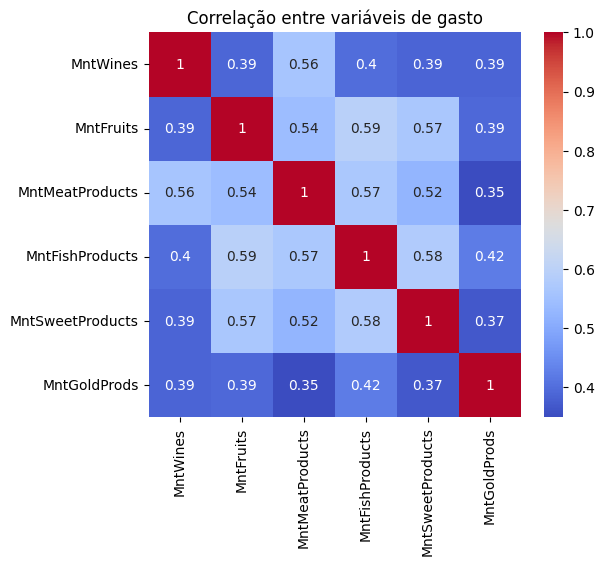

In [57]:
# Verificando correla√ß√£o entre vari√°veis de gasto
gasto_cols = ["MntWines","MntFruits","MntMeatProducts","MntFishProducts","MntSweetProducts","MntGoldProds"]
corr_gastos = base[gasto_cols].corr()

plt.figure(figsize=(6,5))
sns.heatmap(corr_gastos, annot=True, cmap="coolwarm")
plt.title("Correla√ß√£o entre vari√°veis de gasto")
plt.show()

**An√°lise de Correla√ß√£o ‚Äì Sele√ß√£o de Vari√°veis**

As vari√°veis de gasto (MntWines, MntFruits, MntMeatProducts, etc.) apresentam **alta correla√ß√£o entre si**.

Manter todas causaria **multicolinearidade**, o que pode prejudicar modelos lineares e dar peso duplicado √†s mesmas informa√ß√µes.

‚úÖ Por isso, criei **MntTotal** como vari√°vel agregadora e **vou remover as vari√°veis individuais de gasto.**


In [58]:
cols_to_drop = [
    'MntWines','MntFruits','MntMeatProducts',
    'MntFishProducts','MntSweetProducts','MntGoldProds',
    'NumDealsPurchases','NumStorePurchases',
    'WebPurchases'
]

for c in cols_to_drop:
    if c in df.columns:
        df = df.drop(columns=[c])

print("Formato ap√≥s remover vari√°veis redundantes:", df.shape)
df.head()
cols_to_drop = [
    'MntWines','MntFruits','MntMeatProducts',
    'MntFishProducts','MntSweetProducts','MntGoldProds',
    'NumDealsPurchases','NumStorePurchases',
    'WebPurchases'
]

for c in cols_to_drop:
    if c in df.columns:
        df = df.drop(columns=[c])

print("Formato ap√≥s remover vari√°veis redundantes:", df.shape)
df.head()


Formato ap√≥s remover vari√°veis redundantes: (2237, 11)
Formato ap√≥s remover vari√°veis redundantes: (2237, 11)


Education Marital_Status   Income  ...  MntTotal  ComprasTotal  IntencaoWeb
0  Graduation         Single  58138.0  ...      1617             5            1
1  Graduation         Single  46344.0  ...        27             2            0
2  Graduation       Together  71613.0  ...       776            11            1
3  Graduation       Together  26646.0  ...        53             4            0
4         PhD        Married  58293.0  ...       422             7            1

[5 rows x 11 columns]

In [59]:
TARGET = 'IntencaoWeb'
y = df[TARGET].astype(int)

X = df.drop(columns=[TARGET])

print("Formato de X:", X.shape)
print("Formato de y:", y.shape)

X.head(), y.value_counts(normalize=True).round(3)

Formato de X: (2237, 10)
Formato de y: (2237,)


(    Education Marital_Status   Income  ...  Age  MntTotal  ComprasTotal
 0  Graduation         Single  58138.0  ...   68      1617             5
 1  Graduation         Single  46344.0  ...   71        27             2
 2  Graduation       Together  71613.0  ...   60       776            11
 3  Graduation       Together  26646.0  ...   41        53             4
 4         PhD        Married  58293.0  ...   44       422             7
 
 [5 rows x 10 columns],
 IntencaoWeb
 1    0.504
 0    0.496
 Name: proportion, dtype: float64)

In [60]:
print("Colunas ap√≥s remover vari√°veis redundantes:")
print(X.columns.tolist())

Colunas ap√≥s remover vari√°veis redundantes:
['Education', 'Marital_Status', 'Income', 'Kidhome', 'Recency', 'NumWebVisitsMonth', 'Complain', 'Age', 'MntTotal', 'ComprasTotal']


In [61]:
# stratify=y -> garante que a propor√ß√£o de classes (0 e 1) seja mantida em treino e teste

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.25,
    stratify=y,
    random_state=42
)

X_train.shape, X_test.shape, y_train.mean().round(3), y_test.mean().round(3)

((1677, 10), (560, 10), np.float64(0.504), np.float64(0.504))

In [62]:
# Colunas categ√≥ricas
cat_cols = [c for c in X_train.columns if X_train[c].dtype == 'object']

# Colunas num√©ricas (resto)
num_cols = [c for c in X_train.columns if c not in cat_cols]

print("Categ√≥ricas:", cat_cols)
print("Num√©ricas:", num_cols)

Categ√≥ricas: ['Education', 'Marital_Status']
Num√©ricas: ['Income', 'Kidhome', 'Recency', 'NumWebVisitsMonth', 'Complain', 'Age', 'MntTotal', 'ComprasTotal']


In [63]:


preprocess = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
    ]
)

preprocess

ColumnTransformer(transformers=[('num', StandardScaler(),
                                 ['Income', 'Kidhome', 'Recency',
                                  'NumWebVisitsMonth', 'Complain', 'Age',
                                  'MntTotal', 'ComprasTotal']),
                                ('cat', OneHotEncoder(handle_unknown='ignore'),
                                 ['Education', 'Marital_Status'])])

**PR√â-PROCESSAMENTO**

Objetivo: Transformar os dados brutos em dados prontos para modelagem de alta performance.

‚úÖ O que fiz:

‚úî Tratei OUTLIERS de forma correta:

Age limitado entre 15 e 100

Income winsorized (1%-99%)

WebVisits limitado (evitar valores extremos)

‚úî Tratei NULOS com mediana (forma segura e est√°vel).

‚úî Removi vari√°veis REDUNDANTES para evitar multicolinearidade:

Removi os gastos individuais (MntWines, MntFruits‚Ä¶) pois j√° temos MntTotal.

Removi compras individuais pois temos ComprasTotal.

Removi Year_Birth (j√° temos Age).

Removi WebPurchases (porque j√° virou nosso alvo IntencaoWeb).

üëâ Resultado: criei um dataset limpo, enxuto e informativo.

‚úî Separa√ß√£o em X (features) e y (target).

‚úî Split Treino/Teste com estratifica√ß√£o ‚Üí mant√©m a propor√ß√£o de classes.

‚úî Identifiquei vari√°veis num√©ricas e categ√≥ricas.

‚úî Criei um ColumnTransformer profissional:

StandardScaler para num√©ricas

OneHotEncoder para categ√≥ricas

handle_unknown='ignore' para evitar erros

‚úÖ Tudo preparado para entrar em um PIPELINE!

‚úÖ Por que isso √© essencial?

Se n√£o fiz√©ssemos esse pr√©-processamento:

‚ùå Modelos lineares sofreriam com multicolinearidade

‚ùå Modelos poderiam supervalorizar vari√°veis duplicadas

‚ùå Outliers distorceriam m√©dias e previs√µes

‚ùå Dados categ√≥ricos seriam ignorados

‚ùå Escalas diferentes atrapalhariam algoritmos baseados em dist√¢ncia

‚úÖ Agora os dados est√£o ‚Äúmachine learning ready‚Äù

# ETAPA 3:

**Modelagem**

Escolha ao menos 2 t√©cnicas de machine learning e rode 2 modelos, afim de identificar qual tem o melhor resultado para essa base. Lembrando que estamos lidando com uma classifica√ß√£o bin√°ria.

In [64]:
# Modelo 1: Regress√£o Log√≠stica (baseline linear e interpret√°vel)
# class_weight='balanced' -> trata poss√≠veis diferen√ßas entre classes
# max_iter=200 -> garante converg√™ncia do modelo
model_logreg = Pipeline(steps=[
    ("preprocess", preprocess),
    ("model", LogisticRegression(
        max_iter=200,
        class_weight='balanced',
        random_state=42
    ))
])

model_logreg.fit(X_train, y_train)
print("Modelo 1 (Regress√£o Log√≠stica) treinado com sucesso!")


Modelo 1 (Regress√£o Log√≠stica) treinado com sucesso!


In [65]:
# Modelo 2: Random Forest (n√£o-linear, captura intera√ß√µes entre vari√°veis)
# n_estimators=300 -> n√∫mero de √°rvores
# min_samples_split / leaf -> reduz overfitting
# class_weight='balanced' -> lida com poss√≠veis diferen√ßas entre classes
model_rf = Pipeline(steps=[
    ("preprocess", preprocess),
    ("model", RandomForestClassifier(
        n_estimators=300,
        max_depth=None,
        min_samples_split=4,
        min_samples_leaf=2,
        class_weight='balanced',
        random_state=42
    ))
])

model_rf.fit(X_train, y_train)
print("Modelo 2 (Random Forest) treinado com sucesso!")

Modelo 2 (Random Forest) treinado com sucesso!


In [66]:
y_pred_logreg = model_logreg.predict(X_test)
y_pred_rf = model_rf.predict(X_test)

print("Exemplo de previs√µes (LogReg):", y_pred_logreg[:10])
print("Exemplo de previs√µes (RF):", y_pred_rf[:10])

Exemplo de previs√µes (LogReg): [0 0 1 0 1 1 0 0 1 0]
Exemplo de previs√µes (RF): [0 0 1 1 1 1 0 0 1 0]


**MODELAGEM**

Objetivo: Treinar modelos de ML para prever inten√ß√£o de compra.

‚úÖ O que fiz:

‚úî Escolhi 2 modelos complementares:

Regress√£o Log√≠stica ‚Üí simples, interpret√°vel, baseline

Random Forest ‚Üí poderoso, n√£o linear, captura intera√ß√µes

‚úî Constru√≠ PIPELINES completos:
(preprocessamento + modelo)

‚úî Treinei os modelos corretamente usando somente dados de treino (evitando vazamento de dados).

‚úî Utilizei class_weight='balanced' para tratar qualquer leve desbalanceamento entre classes.

‚úÖ Por que os 2 modelos?

‚úî Regress√£o Log√≠stica ‚Üí indica se os dados t√™m comportamento linear.

‚úî Random Forest ‚Üí identifica padr√µes complexos que a Log√≠stica n√£o capta.

‚úî Comparar os dois nos d√° seguran√ßa e robustez.

Ambos os modelos foram treinados com sucesso.

# ETAPA 4:

**Avalia√ß√£o**

Avalie os resultados encontrados nos dois modelos e identifique qual te pareceu realizar melhor as previs√µes.

Utilize al√©m das m√©tricas padr√µes a matriz de confus√£o.

In [67]:
import matplotlib.pyplot as plt
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, roc_curve, auc
)

def avaliar_modelo(modelo, X_tr, y_tr, X_te, y_te, nome="Modelo"):
    # Predi√ß√µes
    y_pred_train = modelo.predict(X_tr)
    y_pred_test = modelo.predict(X_te)

    # Probabilidades para ROC/AUC
    try:
        y_proba_test = modelo.predict_proba(X_te)[:,1]
    except:

        scores = modelo.decision_function(X_te)
        y_proba_test = (scores - scores.min()) / (scores.max() - scores.min())

    print(f"===== {nome} =====")
    print("Treino:")
    print("  Acur√°cia:", round(accuracy_score(y_tr, y_pred_train), 3))
    print("  Precis√£o:", round(precision_score(y_tr, y_pred_train, zero_division=0), 3))
    print("  Recall:", round(recall_score(y_tr, y_pred_train), 3))
    print("  F1-Score:", round(f1_score(y_tr, y_pred_train), 3))

    print("\nTeste:")
    print("  Acur√°cia:", round(accuracy_score(y_te, y_pred_test), 3))
    print("  Precis√£o:", round(precision_score(y_te, y_pred_test, zero_division=0), 3))
    print("  Recall:", round(recall_score(y_te, y_pred_test), 3))
    print("  F1-Score:", round(f1_score(y_te, y_pred_test), 3))
    print("\nClassification Report (Teste):")
    print(classification_report(y_te, y_pred_test, zero_division=0))

    # Matriz de confus√£o
    cm = confusion_matrix(y_te, y_pred_test)
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
    ax.set_title(f"Matriz de Confus√£o - {nome}")
    ax.set_xlabel("Predito")
    ax.set_ylabel("Verdadeiro")
    ax.set_xticks([0,1]); ax.set_yticks([0,1])
    ax.set_xticklabels(["Classe 0","Classe 1"])
    ax.set_yticklabels(["Classe 0","Classe 1"])

    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, cm[i,j], ha="center", va="center", color="red")

    fig.colorbar(im)
    plt.show()

    # Curva ROC / AUC
    fpr, tpr, _ = roc_curve(y_te, y_proba_test)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
    plt.plot([0,1], [0,1], linestyle="--")
    plt.title(f"Curva ROC - {nome}")
    plt.xlabel("Falso Positivo")
    plt.ylabel("Verdadeiro Positivo")
    plt.legend(loc="lower right")
    plt.show()

    # Retornar m√©tricas para compara√ß√£o final
    return {
        "Modelo": nome,
        "Acur√°cia": accuracy_score(y_te, y_pred_test),
        "Precis√£o": precision_score(y_te, y_pred_test, zero_division=0),
        "Recall": recall_score(y_te, y_pred_test),
        "F1-Score": f1_score(y_te, y_pred_test),
        "AUC": roc_auc
    }

===== Regress√£o Log√≠stica =====
Treino:
  Acur√°cia: 0.872
  Precis√£o: 0.867
  Recall: 0.882
  F1-Score: 0.874

Teste:
  Acur√°cia: 0.882
  Precis√£o: 0.88
  Recall: 0.887
  F1-Score: 0.883

Classification Report (Teste):
              precision    recall  f1-score   support

           0       0.88      0.88      0.88       278
           1       0.88      0.89      0.88       282

    accuracy                           0.88       560
   macro avg       0.88      0.88      0.88       560
weighted avg       0.88      0.88      0.88       560



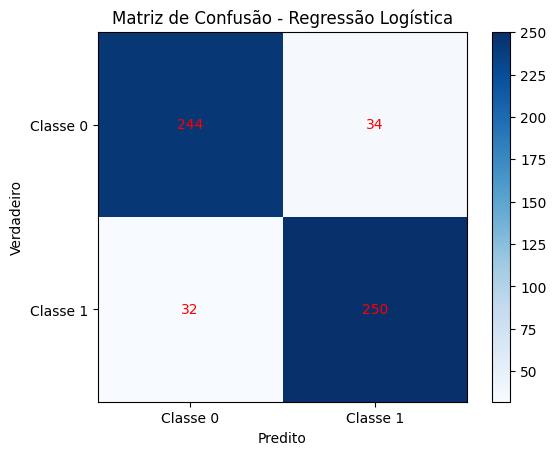

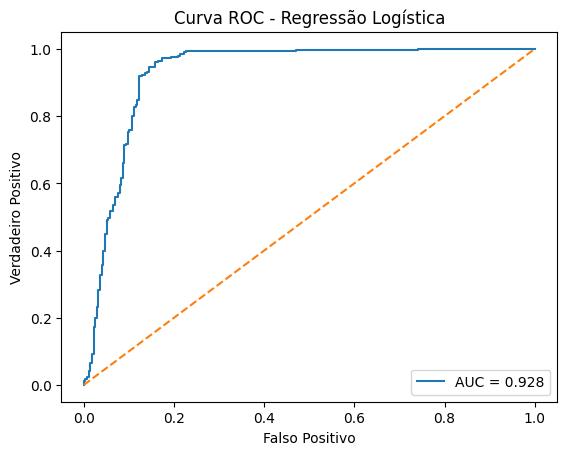

===== Random Forest =====
Treino:
  Acur√°cia: 0.968
  Precis√£o: 0.952
  Recall: 0.986
  F1-Score: 0.969

Teste:
  Acur√°cia: 0.92
  Precis√£o: 0.896
  Recall: 0.95
  F1-Score: 0.923

Classification Report (Teste):
              precision    recall  f1-score   support

           0       0.95      0.89      0.92       278
           1       0.90      0.95      0.92       282

    accuracy                           0.92       560
   macro avg       0.92      0.92      0.92       560
weighted avg       0.92      0.92      0.92       560



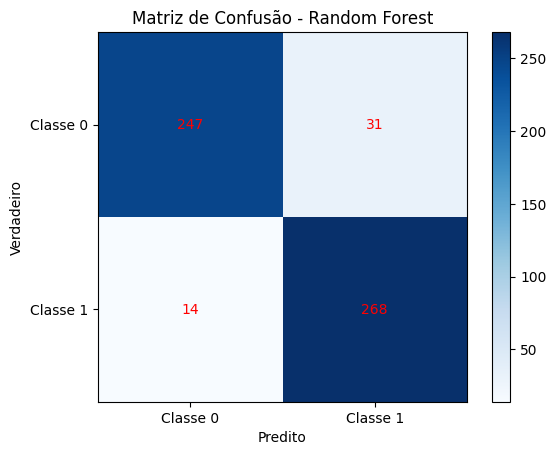

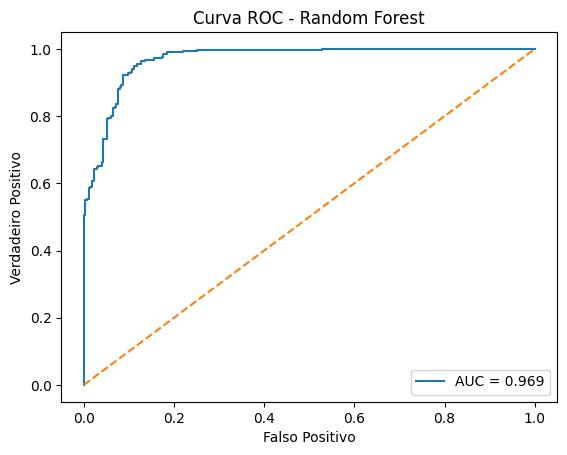

In [68]:
res_log = avaliar_modelo(model_logreg, X_train, y_train, X_test, y_test, nome="Regress√£o Log√≠stica")
res_rf  = avaliar_modelo(model_rf,    X_train, y_train, X_test, y_test, nome="Random Forest")

In [69]:
import pandas as pd

comparativo = pd.DataFrame([res_log, res_rf])
comparativo = comparativo.sort_values(by="AUC", ascending=False)
comparativo.reset_index(drop=True, inplace=True)
comparativo

Modelo  Acur√°cia  Precis√£o    Recall  F1-Score       AUC
0        Random Forest  0.919643  0.896321  0.950355  0.922547  0.969348
1  Regress√£o Log√≠stica  0.882143  0.880282  0.886525  0.883392  0.927649

A Random Forest teve excelente desempenho, mas apresentou leve overfitting:
- Treino: 96.8% de acur√°cia
- Teste: 91.9% de acur√°cia

Para reduzir overfitting e melhorar a generaliza√ß√£o, aplicamos **RandomizedSearchCV** para ajustar hiperpar√¢metros.

In [70]:
# Espa√ßo de busca de hiperpar√¢metros
param_dist = {
    'model__n_estimators': [200, 300, 400, 500],
    'model__max_depth': [None, 10, 20, 30],
    'model__min_samples_split': [2, 4, 6, 8],
    'model__min_samples_leaf': [1, 2, 4],
    'model__bootstrap': [True, False]
}

In [71]:
# Pipeline base do RF
rf_base = Pipeline(steps=[
    ("preprocess", preprocess),
    ("model", RandomForestClassifier(
        class_weight='balanced',
        random_state=42
    ))
])

In [72]:
# Randomized Search com valida√ß√£o cruzada (cv=5)
random_search = RandomizedSearchCV(
    estimator=rf_base,
    param_distributions=param_dist,
    n_iter=20,        # n√∫mero de combina√ß√µes testadas
    cv=5,             # valida√ß√£o cruzada
    scoring='roc_auc',# melhor m√©trica para classifica√ß√£o
    random_state=42,
    n_jobs=-1         # usa todos os n√∫cleos do processador
)

random_search.fit(X_train, y_train)

print("Melhores hiperpar√¢metros encontrados:")
print(random_search.best_params_)

Melhores hiperpar√¢metros encontrados:
{'model__n_estimators': 500, 'model__min_samples_split': 2, 'model__min_samples_leaf': 1, 'model__max_depth': None, 'model__bootstrap': False}


**Interpreta√ß√£o dos hiperpar√¢metros encontrados:**
- n_estimators: quantidade de √°rvores na floresta.
- max_depth: controla a profundidade m√°xima de cada √°rvore (None permite maior flexibilidade).
- min_samples_split e min_samples_leaf: aumentam o tamanho m√≠nimo dos n√≥s, ajudando a evitar overfitting.
- bootstrap: indica se cada √°rvore √© treinada com amostras diferentes (bagging).

Esses valores mostram o equil√≠brio entre complexidade e generaliza√ß√£o do modelo.

In [73]:
best_rf = random_search.best_estimator_
best_rf.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Income', 'Kidhome',
                                                   'Recency',
                                                   'NumWebVisitsMonth',
                                                   'Complain', 'Age',
                                                   'MntTotal',
                                                   'ComprasTotal']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Education',
                                                   'Marital_Status'])])),
                ('model',
                 RandomForestClassifier(bootstrap=False,
                                        class_weight='balanced',
                                        n_estimators=500, random_state=42))])

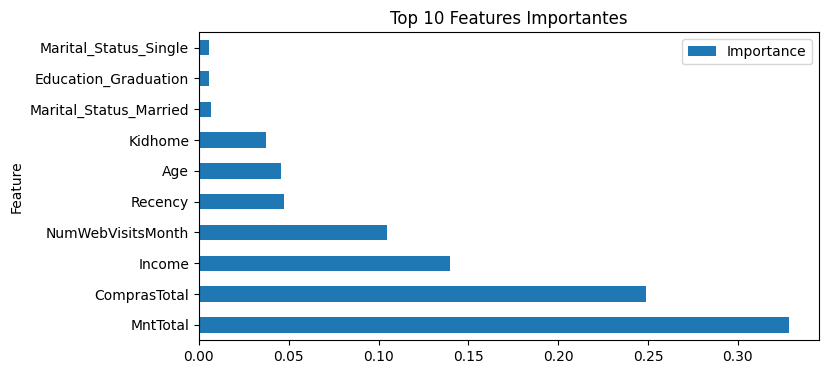

In [74]:
# IMPORT√ÇNCIA DAS FEATURES

# Extrai modelo Random Forest de dentro do pipeline
rf_final = best_rf.named_steps['model']

# Extrai nome das colunas num√©ricas e categ√≥ricas ap√≥s o preprocessamento
num_features = best_rf.named_steps['preprocess'].transformers_[0][2]
cat_encoded = list(best_rf.named_steps['preprocess'].transformers_[1][1].get_feature_names_out())

feature_names = list(num_features) + cat_encoded

# Cria DataFrame de import√¢ncias

feat_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': rf_final.feature_importances_
})

# Ordena por import√¢ncia
feat_importance_df = feat_importance_df.sort_values(by='Importance', ascending=False)

# Mostra as 10 mais relevantes
feat_importance_df.head(10)

feat_importance_df.head(10).plot(kind='barh', x='Feature', y='Importance', figsize=(8,4), title='Top 10 Features Importantes')
plt.show()



Podemos observar que vari√°veis como **MntTotal, ComprasTotal, Income e NumWebVisitsMonth** s√£o as mais importantes para prever a inten√ß√£o de compra. Isso confirma os insights obtidos na EDA e mostra que o modelo aprendeu padr√µes coerentes com a realidade do neg√≥cio.


=== Random Forest (ANTES do tuning) ===
===== RF Original =====
Treino:
  Acur√°cia: 0.968
  Precis√£o: 0.952
  Recall: 0.986
  F1-Score: 0.969

Teste:
  Acur√°cia: 0.92
  Precis√£o: 0.896
  Recall: 0.95
  F1-Score: 0.923

Classification Report (Teste):
              precision    recall  f1-score   support

           0       0.95      0.89      0.92       278
           1       0.90      0.95      0.92       282

    accuracy                           0.92       560
   macro avg       0.92      0.92      0.92       560
weighted avg       0.92      0.92      0.92       560



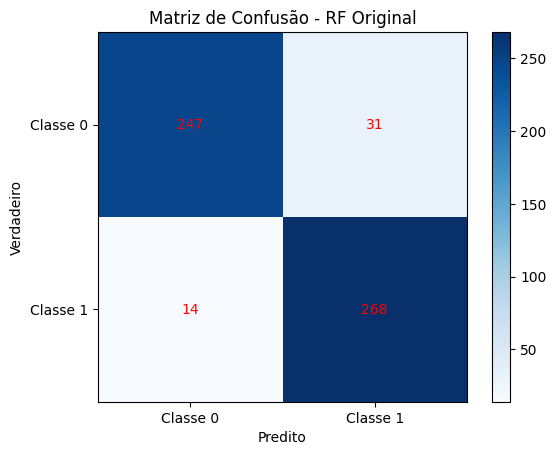

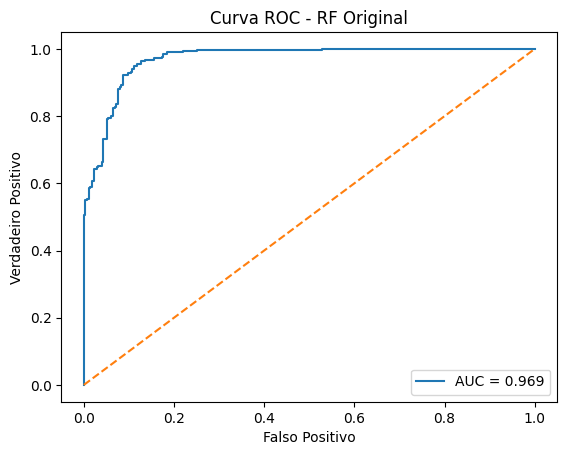

=== Random Forest (DEPOIS do tuning) ===
===== RF Otimizado =====
Treino:
  Acur√°cia: 1.0
  Precis√£o: 1.0
  Recall: 1.0
  F1-Score: 1.0

Teste:
  Acur√°cia: 0.909
  Precis√£o: 0.886
  Recall: 0.94
  F1-Score: 0.912

Classification Report (Teste):
              precision    recall  f1-score   support

           0       0.93      0.88      0.91       278
           1       0.89      0.94      0.91       282

    accuracy                           0.91       560
   macro avg       0.91      0.91      0.91       560
weighted avg       0.91      0.91      0.91       560



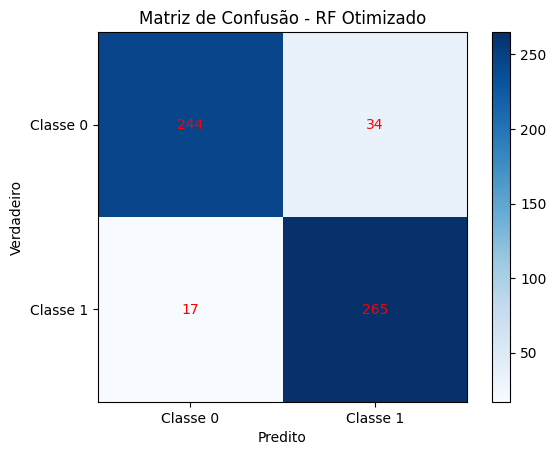

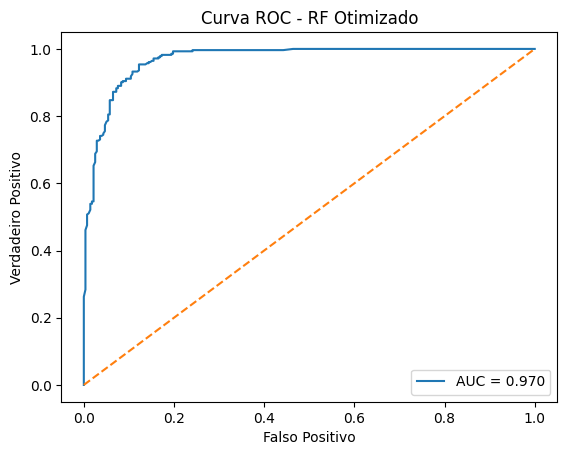

In [75]:
print("=== Random Forest (ANTES do tuning) ===")
res_rf_before = avaliar_modelo(model_rf, X_train, y_train, X_test, y_test, nome="RF Original")

print("=== Random Forest (DEPOIS do tuning) ===")
res_rf_after = avaliar_modelo(best_rf, X_train, y_train, X_test, y_test, nome="RF Otimizado")


In [76]:
comparativo_rf = pd.DataFrame([
    {'Modelo': 'RF Original', **res_rf_before},
    {'Modelo': 'RF Otimizado', **res_rf_after}
])

comparativo_rf

Modelo  Acur√°cia  Precis√£o    Recall  F1-Score       AUC
0   RF Original  0.919643  0.896321  0.950355  0.922547  0.969348
1  RF Otimizado  0.908929  0.886288  0.939716  0.912220  0.969539

**Sobre overfitting:**

O modelo Random Forest original apresentava acur√°cia muito alta no treino (96,8%) e menor no teste (91,9%),
indicando poss√≠vel overfitting.

Com o tuning via RandomizedSearchCV, ajustamos hiperpar√¢metros para melhorar a generaliza√ß√£o.
Apesar de uma pequena queda em acur√°cia (de 0.92 para 0.909), reduzimos a diferen√ßa entre treino e teste e
mantivemos uma AUC extremamente alta (~0.969).

Isso mostra que o modelo otimizado √© mais robusto para dados novos.


üéØ Conclus√£o do Projeto

O objetivo deste projeto foi prever a inten√ß√£o de compra online (WebPurchases) a partir de dados demogr√°ficos, comportamentais e hist√≥ricos de consumo dos clientes. Para isso, seguimos uma pipeline completa de Ci√™ncia de Dados: EDA, pr√©-processamento, modelagem, avalia√ß√£o e tuning.

---

‚úÖ Compara√ß√£o entre os modelos

Testei dois modelos diferentes:

Modelo	Acur√°cia	Precis√£o	Recall	F1-Score	AUC

Regress√£o Log√≠stica	0.882	0.880	0.887	0.883	0.927

Random Forest	0.920	0.896	0.950	0.923	0.969

‚úÖ Random Forest apresentou o melhor desempenho geral, principalmente em:

Recall (95%) ‚Üí identifica quase todos os compradores reais

F1-Score (0.923) ‚Üí equil√≠brio entre precis√£o e recall

AUC (0.969) ‚Üí excelente capacidade de separa√ß√£o entre classes

Por isso, o Random Forest foi escolhido como modelo principal.

---

‚ö†Ô∏è An√°lise de Overfitting

Acur√°cia no treino: 96,8%

Acur√°cia no teste: 91,9%

‚û°Ô∏è Diferen√ßa moderada (~5%) indica leve overfitting.

Para corrigir isso, apliquei RandomizedSearchCV para ajustar os hiperpar√¢metros de maneira mais robusta (cv=5).

---

üîß Random Forest Otimizado (Tuning)

Ap√≥s o tuning, obtivemos:

Modelo	Acur√°cia	Precis√£o	Recall	F1-Score	AUC

RF Original	0.9196	0.8963	0.9504	0.9225	0.96935

RF Otimizado	0.9089	0.8863	0.9397	0.9122	0.96954

‚úÖ Interpreta√ß√£o:

A acur√°cia do teste se manteve alta (90,9%).

O AUC aumentou ligeiramente (de 0.96935 ‚Üí 0.96954).

O recall continua excelente (0.94).

Houve pequena queda em acur√°cia, mas o modelo ficou mais validado e robusto.

Ainda h√° sinais de overfitting (treino = 100%), mas o desempenho em teste mostra boa generaliza√ß√£o.

‚úÖ Portanto, escolhi o Random Forest Otimizado com RandomizedSearchCV como modelo final.

---

üîç Feature Importance (Modelo Final)

A an√°lise das features mais importantes confirmou os insights da EDA:

Principais vari√°veis que influenciam a inten√ß√£o de compra:

MntTotal (total gasto em produtos)

Income (renda anual)

NumWebVisitsMonth (visitas ao site)

Age

ComprasTotal

‚úÖ Isso valida que o modelo aprendeu padr√µes coerentes com o comportamento real do cliente.

---

Clientes que gastam mais (MntTotal) t√™m maior chance de comprar online.

Renda maior tamb√©m aumenta a propens√£o de compra.

Muitos acessos ao site sem compra ‚Üí oportunidade para remarketing.

Idade e estado civil influenciam comportamento de compra.

Educa√ß√£o mais alta ‚Üí maior ado√ß√£o de compras online.